In [4]:
import torch
from torch import nn
from torch.nn import functional as F 
from torch import optim 
import torchvision
import matplotlib.pyplot as plt
# %run utils.py
from utils import plot_image, plot_curve, one_hot

In [5]:
batch_size=512

step1 load dataset

In [8]:
train_data=torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data',train=True,download=True,
                          transform=torchvision.transforms.Compose([
                              torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(
                                  (0.1307,),(0.3081,))
                          ])),
    batch_size=batch_size,shuffle=True)

test_data = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data/', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=False)

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


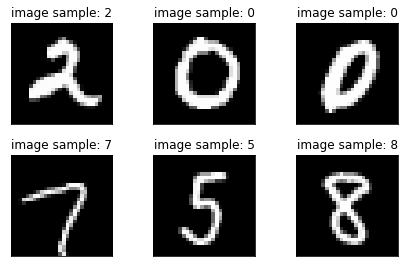

In [9]:
x,y=next(iter(train_data))
print(x.shape,y.shape,x.min(),x.max())
plot_image(x,y,'image sample')

step2 generate net

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # w*x+b
        self.fc1=nn.Linear(28*28,256)
        self.fc2=nn.Linear(256,64)
        self.fc3=nn.Linear(64,10)
        
    def forward(self,x):
        # x: [b,1,28,28]
        # h1=relu(x*w1+b1)
        x=F.relu(self.fc1(x))
        # h2=relu(h1*w2+b2)
        x=F.relu(self.fc2(x))
        # h3=h2*w3+b3
        x=self.fc3(x)
        
        return x 

step2 start training

0 0 0.10705742985010147
0 10 0.10562162101268768
0 20 0.09950540959835052
0 30 0.09500012546777725
0 40 0.0921851173043251
0 50 0.08977575600147247
0 60 0.08762452751398087
0 70 0.08473461866378784
0 80 0.08493354916572571
0 90 0.08310866355895996
0 100 0.08216533809900284
0 110 0.08140002191066742
1 0 0.0798725038766861
1 10 0.07804834097623825
1 20 0.07675984501838684
1 30 0.07731126248836517
1 40 0.0772140622138977
1 50 0.0758262574672699
1 60 0.07421033084392548
1 70 0.07461810857057571
1 80 0.0712411031126976
1 90 0.07308779656887054
1 100 0.07134488970041275
1 110 0.0698498860001564
2 0 0.07102860510349274
2 10 0.07011164724826813
2 20 0.07013103365898132
2 30 0.06893101334571838
2 40 0.0683424174785614
2 50 0.06815318763256073
2 60 0.06731651723384857
2 70 0.06611089408397675
2 80 0.06625892966985703
2 90 0.06718404591083527
2 100 0.06523193418979645
2 110 0.06431720405817032


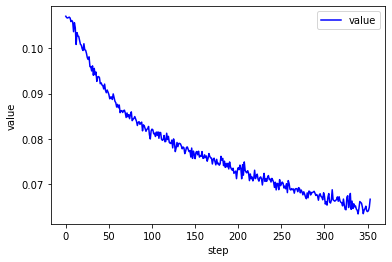

In [12]:
net=Net()
# [w1,b1,w2,b2,w3,b3]
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

train_loss=[]

for epoch in range(3):
    for batch_idx,(x,y) in enumerate(train_data):
        # x: [b,1,28,28], y: [512]
        # [b,1,28,28] => [b,784]
        x=x.view(x.size(0),28*28)
        # => [b,10]
        out=net(x)
        y_onehot=one_hot(y)
        # loss =mse(out,y_onehot)
        loss=F.mse_loss(out,y_onehot)
        
        optimizer.zero_grad()
        loss.backward()
        # w'=w-lr*grad
        optimizer.step()
        
        train_loss.append(loss.item())
        
        if batch_idx % 10 ==0:
            print(epoch, batch_idx, loss.item())

plot_curve(train_loss)

step3 correct rate

In [14]:
total_correct=0
for x,y in test_data:
    x=x.view(x.size(0),28*28)
    out=net(x)
    # out: [b,10] => pred: [b]
    pred=out.argmax(dim=1)
    correct=pred.eq(y).sum().float().item()
    total_correct+=correct
    
total_num=len(test_data.dataset)
acc=total_correct/total_num
print('test acc: ',acc)

test acc:  0.6904


step4 pred show

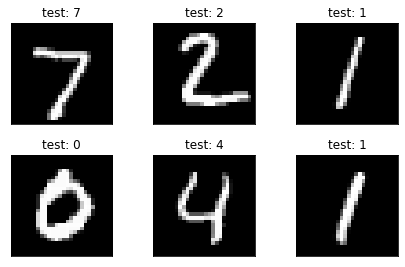

In [15]:
x,y=next(iter(test_data))
out=net(x.view(x.size(0),28*28))
pred=out.argmax(dim=1)
plot_image(x,pred,'test-pred')